In [5]:
# Import the Dependencies
import pandas as pd
from dotenv import load_dotenv
import os
import requests
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
import hvplot.pandas

# Load the env
load_dotenv()

True

In [8]:
# Set the Alpaca API and Secret keys:
alpaca_api_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [9]:
# CALCULATE AND VISUALIZE PROBABILITY DISTRIBUTIONS
# In the following exercise, we'll calculate and visualize the probability distribution for Tesla and Coca-Cola.

In [11]:
# GET THE STOCK DATA
# To get the price data over one year for TSLA and KO stock, we need the ticker symbols, time frame, and the start and end dates.
# We need these items to make the API call via the Alpaca SDK `get_bars()` function.
# Additionally, the `get_bars` function returns only 100 rows of data by default, so in order to obtain enough data, we'll need to overide this by setting the maximum number of rows to 1000:

# Set the TSLA and KO ticker symbols
tickers = ['TSLA', 'KO']

# Set the time frame to 1 day:
timeframe = '1Day'

# Set the start and end dates to 1 year apart
start_date = pd.Timestamp('2022-11-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-11-22', tz='America/New_York').isoformat()

# Get 1-years worth of historical data for TSLA and KO:
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame by separating the ticker data:
TSLA = prices_df[prices_df['symbol']=='TSLA'].drop('symbol', axis=1)
KO = prices_df[prices_df['symbol']=='KO'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([TSLA, KO], axis=1, keys=['TSLA', 'KO'])

# Display the stock data
display(prices_df.head())
display(prices_df.tail())

TSLA                                       \
                            close    high      low trade_count    open   
timestamp                                                                
2022-11-22 05:00:00+00:00  169.91  170.92  166.185      863699  168.63   
2022-11-23 05:00:00+00:00  183.20  183.62  172.500     1195380  173.57   
2022-11-25 05:00:00+00:00  182.86  185.20  180.630      584243  185.06   
2022-11-28 05:00:00+00:00  182.92  188.50  179.000      975440  179.96   
2022-11-29 05:00:00+00:00  180.83  186.38  178.750      883448  184.99   

                                                     KO                  \
                              volume        vwap  close   high      low   
timestamp                                                                 
2022-11-22 05:00:00+00:00   80402272  168.929930  62.35  62.50  62.0538   
2022-11-23 05:00:00+00:00  111649742  179.530859  62.63  62.79  62.3008   
2022-11-25 05:00:00+00:00   51788297  182.948045  62.69  62.81  62.3800   
2022-11-28 05:00:00+00:00   94797017  184.745753  62.70  63.10  62.5600   
2022-11-29 05:00:00+00:00   84640855  182.464163  62.48  62.57  61.9800   

                                                                   
                          trade_count   open    volume       vwap  
timestamp                                                          
2022-11-22 05:00:00+00:00       84370  62.47  12319641  62.285146  
2022-11-23 05:00:00+00:00       75889  62.49   8990385  62.566583  
2022-11-25 05:00:00+00:00       41817  62.73   5165499  62.676746  
2022-11-28 05:00:00+00:00      110606  62.69  12268004  62.783449  
2022-11-29 05:00:00+00:00       90390  62.52  10969563  62.392290

TSLA                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2023-11-16 05:00:00+00:00  233.59  240.88  230.96     1391883  239.49   
2023-11-17 05:00:00+00:00  234.30  237.39  226.54     1374226  232.00   
2023-11-20 05:00:00+00:00  235.60  237.10  231.02     1218647  234.04   
2023-11-21 05:00:00+00:00  241.20  243.62  233.34     1217064  235.04   
2023-11-22 05:00:00+00:00  234.21  244.01  231.40     1284808  242.04   

                                                     KO                   \
                              volume        vwap  close    high      low   
timestamp                                                                  
2023-11-16 05:00:00+00:00  136900875  235.518293  57.15  57.530  56.8100   
2023-11-17 05:00:00+00:00  142599002  233.278469  57.26  57.340  56.7000   
2023-11-20 05:00:00+00:00  116591874  234.228769  57.40  57.575  56.9550   
2023-11-21 05:00:00+00:00  122332956  240.889200  58.03  58.040  57.3300   
2023-11-22 05:00:00+00:00  118017039  234.731969  58.42  58.535  58.1271   

                                                                   
                          trade_count   open    volume       vwap  
timestamp                                                          
2023-11-16 05:00:00+00:00      136250  57.25  16010451  57.142213  
2023-11-17 05:00:00+00:00      127056  57.19  14475968  57.109732  
2023-11-20 05:00:00+00:00      125612  57.05  13053920  57.343868  
2023-11-21 05:00:00+00:00      117991  57.46  13891648  57.836339  
2023-11-22 05:00:00+00:00      118063  58.26  11326432  58.408656

In [12]:
# ANALYZE THE CLOSING PRICES AND DAILY RETURNS
# To analyze the probability distribution of these stock prices, we first need to create a DataFrame that contains only the closing prices for the period.
# Then, we can generate our daily returns DataFrame.
# We start by create the `closing_prices_df` DataFrame, which contains the `close` column of the `prices_df.
# Next, the index for the `closing_prices_df DataFrame needs to keep only the `date` information from the original `time` index.
# Finally, we'll calculate the `daily_returns)df DataFrame by calling the `pct_change()` and `dropna()` functions:

# Create an empty 'closing_prices_df` DataFrame:
closing_prices_df = pd.DataFrame()

# Populate the `closing_prices_df` DataFrame by accessing the `close` column for TSLA & KO:
closing_prices_df['KO'] = prices_df['KO']['close']
closing_prices_df['TSLA'] = prices_df['TSLA']['close']

# Update the index for the `closing_prices_df` DataFrame to include only the date and remove the time:
closing_prices_df.index = closing_prices_df.index.date

# Compute the `daily_returns_df` DataFrame using `pct_change` and `dropna`:
daily_returns_df = closing_prices_df.pct_change().dropna()

# Review the data:
display(daily_returns_df.head())
display(daily_returns_df.tail())

,KO,TSLA
2022-11-23,0.004491,0.078218
2022-11-25,0.000958,-0.001856
2022-11-28,0.000160,0.000328
2022-11-29,-0.003509,-0.011426
2022-11-30,0.018086,0.076702


,KO,TSLA
2023-11-16,-0.001049,-0.038091
2023-11-17,0.001925,0.003040
2023-11-20,0.002445,0.005548
2023-11-21,0.010976,0.023769
2023-11-22,0.006721,-0.028980


In [13]:
# Next, we'll get an overview of the distribution of these values using summary statistics:

# Generate the summary statistics for the `daily_returns_df`:
daily_returns_df.describe()

,KO,TSLA
count,251.000000,251.000000
mean,-0.000223,0.001963
std,0.008517,0.036997
min,-0.048328,-0.122422
25%,-0.005433,-0.017557
50%,0.000000,0.001022
75%,0.004433,0.021973
max,0.028846,0.110002


In [14]:
# The value we'll focus on in the summary statistics is the standard deviation:
# Though there is an std in the summary statistics, it doesn't paint a complete picture of the spread, or distribution, of the daily returns.
# By generating a probability distribution, we can visualize the distribution of all the daily return data points around the mean.
# This is because the probability distribution depends on the standard deviation.

<AxesSubplot:title={'center':'TSLA PROBABILITY DISTRIBUTION'}, ylabel='Frequency'>

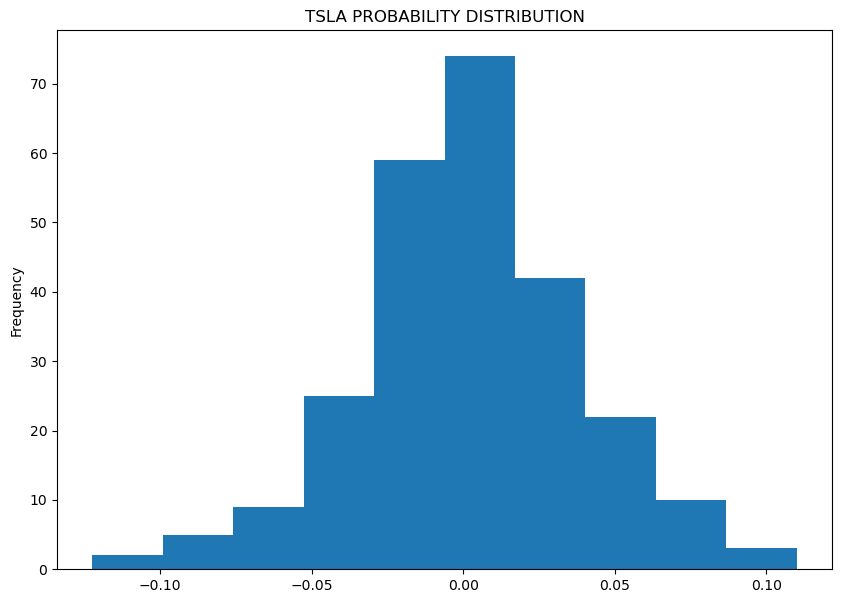

In [16]:
# PLOT THE PROBABILITY DISTRIBUTION
# We visualize a probability distribution by plotting a histogram.
# For a probability distribution, the histogram defines the x-axis values by the range of standard deviations that we generate from the daily return data.
# The y-axis displays the number of daily returns data points that fall inside that range.
# We visualize the histogram for TSLA by calling the `plot.hist` function on the `daily_returns_df` DataFrame, specifying TSLA & KO:

# Visualize distribution of TSLA pct_change in closing prices:
daily_returns_df['TSLA'].plot.hist(
    figsize=(10,7),
    title='TSLA PROBABILITY DISTRIBUTION'
)

<AxesSubplot:title={'center':'KO PROBABILITY DISTRIBUTION'}, ylabel='Frequency'>

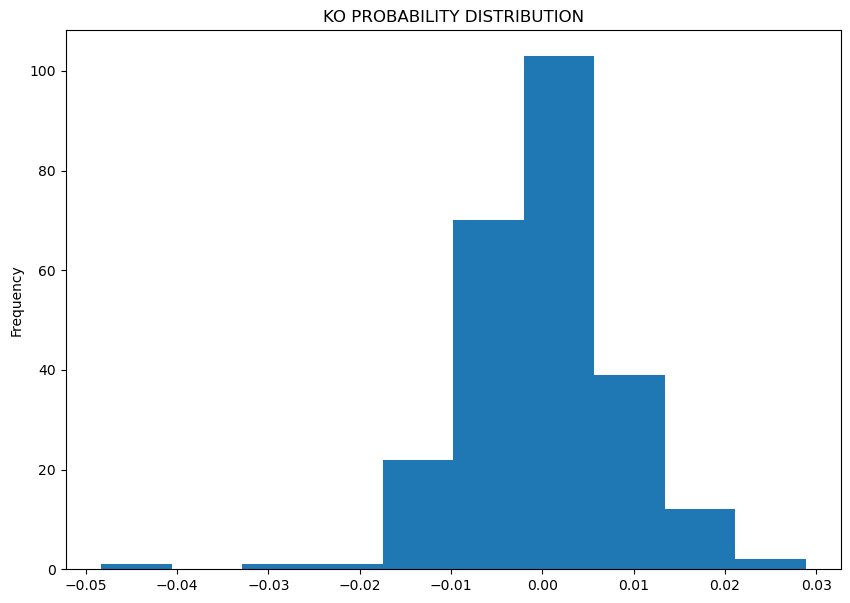

In [17]:
# Visualize the distribution of KO's pct_change closing prices:
daily_returns_df['KO'].plot.hist(
    figsize=(10,7),
    title='KO PROBABILITY DISTRIBUTION'
)

In [18]:
# Both plots resemble the bell-curve shape of a normal distribution.
# This indicates that more daily return data points lie close to the mean than further away.
# Notice also that most daily return data points in KO lie within a standard deviation of +/- .02, while most of TSLA data points like within an std of +/- .05.
# These values indicate that the daily return values for TSLA spread out further around the mean than those for KO.
# TSLA is thus the more more volatile stock of the two.

<AxesSubplot:title={'center':'DENSITY PLOT FOR KO & TSLA'}, ylabel='Density'>

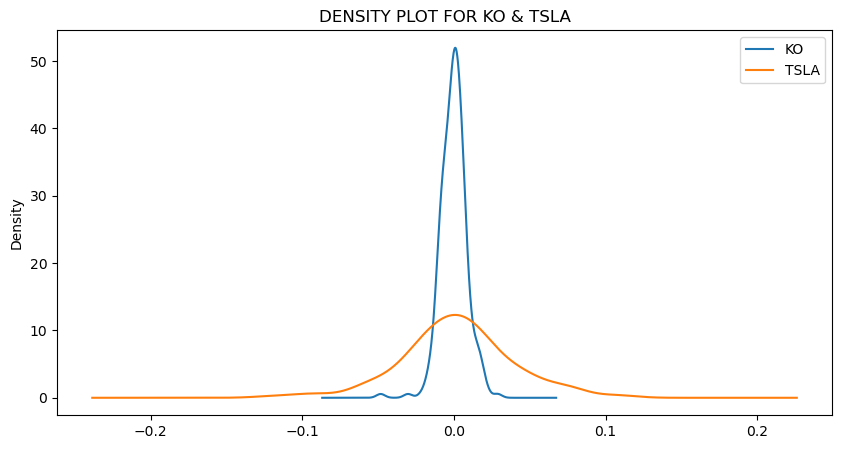

In [19]:
# USE A DENSITY PLOT
# Besides using a histogram, we can use a density plot to visualize the probability distribution of the KO & TSLA daily returns.
# Just like the `rolling()` function smooths out the volatility of daily changes in a stock's std, a DENSITY PLOT smooths out the bins from the probability distribution histogram:
daily_returns_df.plot.density(
    figsize=(10,5),
    title='DENSITY PLOT FOR KO & TSLA'
)

In [20]:
# The overlay of the two distributions shows that the KO distribution has a greater frequency of small daily changes compared to TSLA.
# The blue line for KO illustrates this. 
# Frist, note that the y-axis indicates the number of occurences.
# The blue line for KO reaches much higher along the y-axis.
# This line is also much narrower at the base, which measures the standard deviation, or spread around the mean value.
# The volatility of the stock causes this.
# That is, a smaller std means that the stock is less likely to have large changes in value, positive or negative.

In [ ]:
# ON THE JOB:
# Most pricing distributions aren't perfectly normal.
# However, as a FinTech professional, it's important that you understand the normal distribution.
# In general, it's assumed that prices changes, or daily return values, for stocks and other assets have a normal distribution.
# This is especially true as the time period for the analysis increases.